# Scaler Mart Sales decrease Case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
cust_data=('Customer',pd.read_excel('Customer.xlsx'))#Customer_data
prod_data=('Products',pd.read_csv('Products.csv'))#Products data
sale_data=('Sales',pd.read_csv('Sales.csv'))#Sales Data

data=[cust_data,prod_data,sale_data]#Contains the above data set's

In [3]:
#Function to View the basic info of the data sets
def base_eda(name,df):
    print(name)
    print('_'*125)
    print('')
    print(f'{name} Data Preview')
    print(df.head())
    print('')
    print(f'{name} Data type Preview')
    print(df.info())
    print('')
    print(f'{name} Shape Preview')
    print(df.shape)
    print('')
    print(f'{name} Columns and null Value % Preview')
    print(df.isnull().sum()/df.shape[0]*100)
    print('')
    print(f'{name} Duplicate count')
    print(df.duplicated().sum())
    print('')
    print(f'{name} Basic Stats Preview')
    print(df.describe())
    print('')
    print(f'{name} Basic Stats Preview')
    print(df.describe(include='object'))
    print('')
    print('_'*125)
    print('_'*125)
    

In [4]:
#Viweing the basis info of all the three data sets
for name,df in data:
    base_eda(name,df)

Customer
_____________________________________________________________________________________________________________________________

Customer Data Preview
   CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent   Birthday  
0    South Australia     5523  Australia  Australia 1939-07-03  
1  Western Australia     6522  Australia  Australia 1979-09-27  
2           Victoria     3380  Australia  Australia 1947-05-26  
3    South Australia     5223  Australia  Australia 1957-09-17  
4           Victoria     3698  Australia  Australia 1965-11-19  

Customer Data type

        Order Date Delivery Date Currency Code
count        62884         13165         62884
unique        1641          1492             5
top     12/21/2019      1/6/2020           USD
freq           222            50         33767

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________


In [5]:
#No transformation is done in Customer data 
#Null values in Customer data 'State Code' Can be ignore because we are not going to use it in Analysis 
cust_data[1][cust_data[1]['State Code'].isnull()]

CustomerKey  Gender                Name               City State Code  \
5304       729681  Female    Rossana Padovesi            Polvica        NaN   
5316       732289    Male        Indro Piccio          Varcaturo        NaN   
5372       742042    Male     Amaranto Loggia          Casaferro        NaN   
5377       742886  Female       Edmonda Capon           Terzigno        NaN   
5378       743343  Female        Ambra Sagese  Pomigliano D'Arco        NaN   
5485       759705    Male    Callisto Lo Duca            Casilli        NaN   
5525       765589    Male  Michelino Lucchesi       Pompei Scavi        NaN   
5531       766410    Male   Adelmio Beneventi             Licola        NaN   
5631       781667  Female          Ilda Manna             Napoli        NaN   
5695       789177    Male   Calogero Folliero      Mariglianella        NaN   

       State Zip Code Country Continent   Birthday  
5304  Napoli    80035   Italy    Europe 1981-04-18  
5316  Napoli    80014   Italy    Europe 1949-02-24  
5372  Napoli    80034   Italy    Europe 1936-03-14  
5377  Napoli    80040   Italy    Europe 1963-08-06  
5378  Napoli    80038   Italy    Europe 1961-01-05  
5485  Napoli    80047   Italy    Europe 1976-08-28  
5525  Napoli    80045   Italy    Europe 1947-11-13  
5531  Napoli    80078   Italy    Europe 1940-01-13  
5631  Napoli    80134   Italy    Europe 1977-05-08  
5695  Napoli    80030   Italy    Europe 2000-03-03

In [6]:
#Transformation is done in Products data
#we are removing $ from the price columns
prod_data[1]['Unit Cost USD']=prod_data[1]['Unit Cost USD'].apply(lambda x:x.replace(',',''))
prod_data[1]['Unit Cost USD']=prod_data[1]['Unit Cost USD'].apply(lambda x:float(x.strip('$')))#prod_data[1][prod_data[1]['Unit Cost USD']==1060.22]


prod_data[1]['Unit Price USD']=prod_data[1]['Unit Price USD'].apply(lambda x:x.replace(',',''))
prod_data[1]['Unit Price USD']=prod_data[1]['Unit Price USD'].apply(lambda x:float(x.strip('$')))


In [7]:
#Transformation is done in Sales data
#Converting the data type od date column to datetime data type
sale_data[1]['Order Date']=pd.to_datetime(sale_data[1]['Order Date'])
#Null values in Sales data 'Delivery Date' Can be ignore because we are not going to it 
sale_data[1][sale_data[1]['Delivery Date'].isnull()]

Order Number  Line Item Order Date Delivery Date  CustomerKey  \
0            366000          1 2016-01-01           NaN       265598   
6            366004          1 2016-01-01           NaN      1107461   
7            366004          2 2016-01-01           NaN      1107461   
8            366005          1 2016-01-01           NaN       844003   
9            366007          1 2016-01-01           NaN      2035771   
...             ...        ...        ...           ...          ...   
62867       2243025          1 2021-02-20           NaN      1909290   
62868       2243025          2 2021-02-20           NaN      1909290   
62869       2243026          1 2021-02-20           NaN      1737466   
62872       2243028          1 2021-02-20           NaN      1728060   
62879       2243030          1 2021-02-20           NaN      1216913   

       StoreKey  ProductKey  Quantity Currency Code  
0            10        1304         1           CAD  
6            38         163         6           GBP  
7            38        1529         2           GBP  
8            33         421         4           EUR  
9            43        1617         1           USD  
...         ...         ...       ...           ...  
62867        49        1128         2           USD  
62868        49        2511         2           USD  
62869        49          58         6           USD  
62872        66        1584         3           USD  
62879        43         632         3           USD  

[49719 rows x 9 columns]

In [8]:
#Visulaising the data sets
cust_data[1].head(1)

CustomerKey  Gender           Name            City State Code  \
0          301  Female  Lilly Harding  WANDEARAH EAST         SA   

             State Zip Code    Country  Continent   Birthday  
0  South Australia     5523  Australia  Australia 1939-07-03

In [9]:
prod_data[1].head(1)

ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   

   Unit Cost USD  Unit Price USD  SubcategoryKey Subcategory  CategoryKey  \
0           6.62           12.99             101     MP4&MP3            1   

  Category  
0    Audio

In [10]:
sale_data[1].head(1)

Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1 2016-01-01           NaN       265598        10   

   ProductKey  Quantity Currency Code  
0        1304         1           CAD

## Analysing the data based on Demographics

In [11]:
#Performing data Manipulation to derive necessary columns
demog_data=pd.merge(pd.merge(cust_data[1],sale_data[1],on='CustomerKey'),prod_data[1],on='ProductKey')
demog_data['OrderYear']=demog_data['Order Date'].dt.year
demog_data['OrderMonth']=demog_data['Order Date'].dt.month
demog_data['Total_price']=demog_data['Unit Price USD']*demog_data['Quantity']
demog_data['Age']=(2019-demog_data['Birthday'].dt.year.astype('int'))

#Categorising the Age 
bins=[0,24,64,100]
labels=['Youth','Adults','Seniors']
demog_data['AgeCat']=pd.cut(demog_data['Age'],bins=bins,labels=labels).astype('object')

In [12]:
#Dropping below two columns as they have null and wont be used
demog_data.drop(['State Code','Delivery Date'],axis=1,inplace=True)

In [13]:
demog_data.head(1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     1 non-null      int64         
 1   Gender          1 non-null      object        
 2   Name            1 non-null      object        
 3   City            1 non-null      object        
 4   State           1 non-null      object        
 5   Zip Code        1 non-null      object        
 6   Country         1 non-null      object        
 7   Continent       1 non-null      object        
 8   Birthday        1 non-null      datetime64[ns]
 9   Order Number    1 non-null      int64         
 10  Line Item       1 non-null      int64         
 11  Order Date      1 non-null      datetime64[ns]
 12  StoreKey        1 non-null      int64         
 13  ProductKey      1 non-null      int64         
 14  Quantity        1 non-null      int64         
 15  Currency C

In [14]:
#List of categorical columns
cat_col=list(demog_data.select_dtypes(include='O').columns)
cat_col

['Gender',
 'Name',
 'City',
 'State',
 'Zip Code',
 'Country',
 'Continent',
 'Currency Code',
 'Product Name',
 'Brand',
 'Color',
 'Subcategory',
 'Category',
 'AgeCat']

In [15]:
#List of numerical columns
num_col=list(demog_data.select_dtypes(exclude='O').columns)
num_col

['CustomerKey',
 'Birthday',
 'Order Number',
 'Line Item',
 'Order Date',
 'StoreKey',
 'ProductKey',
 'Quantity',
 'Unit Cost USD',
 'Unit Price USD',
 'SubcategoryKey',
 'CategoryKey',
 'OrderYear',
 'OrderMonth',
 'Total_price',
 'Age']

In [16]:
#Checking max and min order date 
demog_data['Order Date'].max(),demog_data['Order Date'].min()

(Timestamp('2021-02-20 00:00:00'), Timestamp('2016-01-01 00:00:00'))

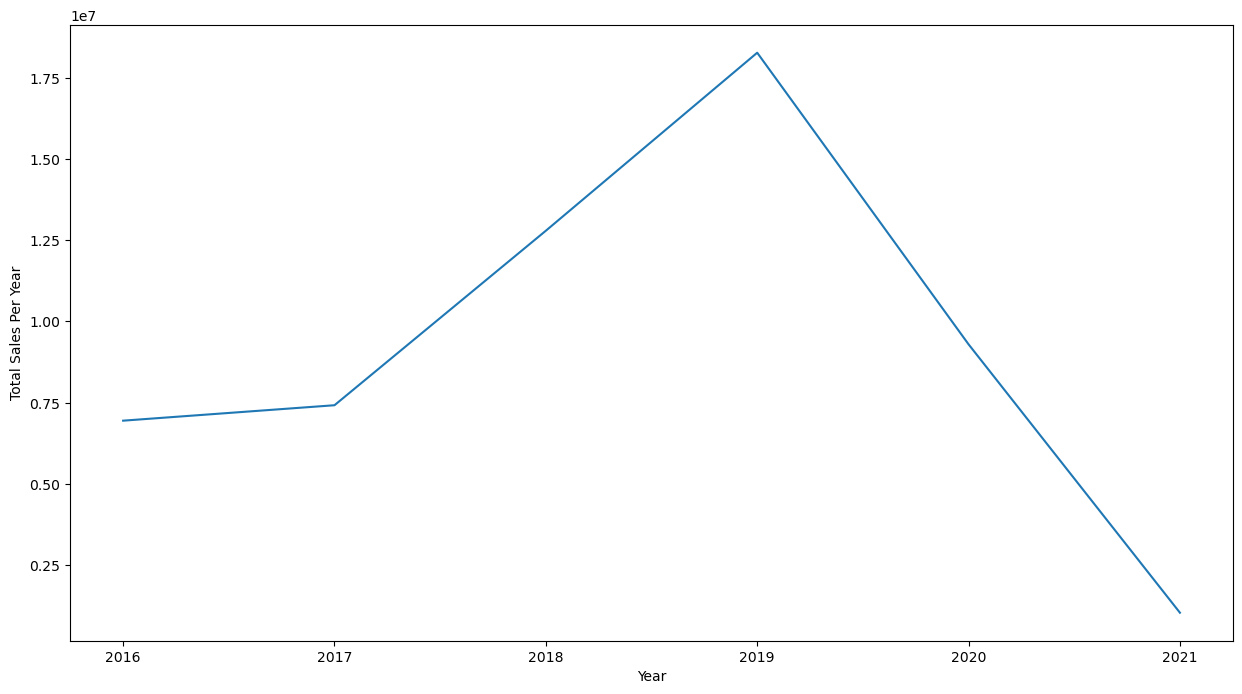

In [17]:
#The company has faced a decline in sales for the year 2020 compared to 2019.Lets verify that
plt.figure(figsize=(15,8))
sns.lineplot(data=demog_data.groupby('OrderYear')['Total_price'].sum().reset_index(),x='OrderYear',y='Total_price')
plt.xlabel('Year')
plt.ylabel('Total Sales Per Year')
plt.show()

In [18]:
#We can see that there is a deline as mentioned from 2019 to 2020
#So lets seperate the data for 2019 and 2020

In [19]:
#Seperating the data based on the two years of comparison
data_19=demog_data[demog_data['OrderYear']==2019]
data_20=demog_data[demog_data['OrderYear']==2020]
len(cat_col),len(num_col),data_19.shape,data_20.shape


(14, 16, (21611, 30), (11026, 30))

In [20]:
#Reomving these column as they are too large to be visualized here
cat_col=[i for i in cat_col if i not in ['Name','Zip Code','Currency Code','City','State','Product Name']]
cat_col

['Gender',
 'Country',
 'Continent',
 'Brand',
 'Color',
 'Subcategory',
 'Category',
 'AgeCat']

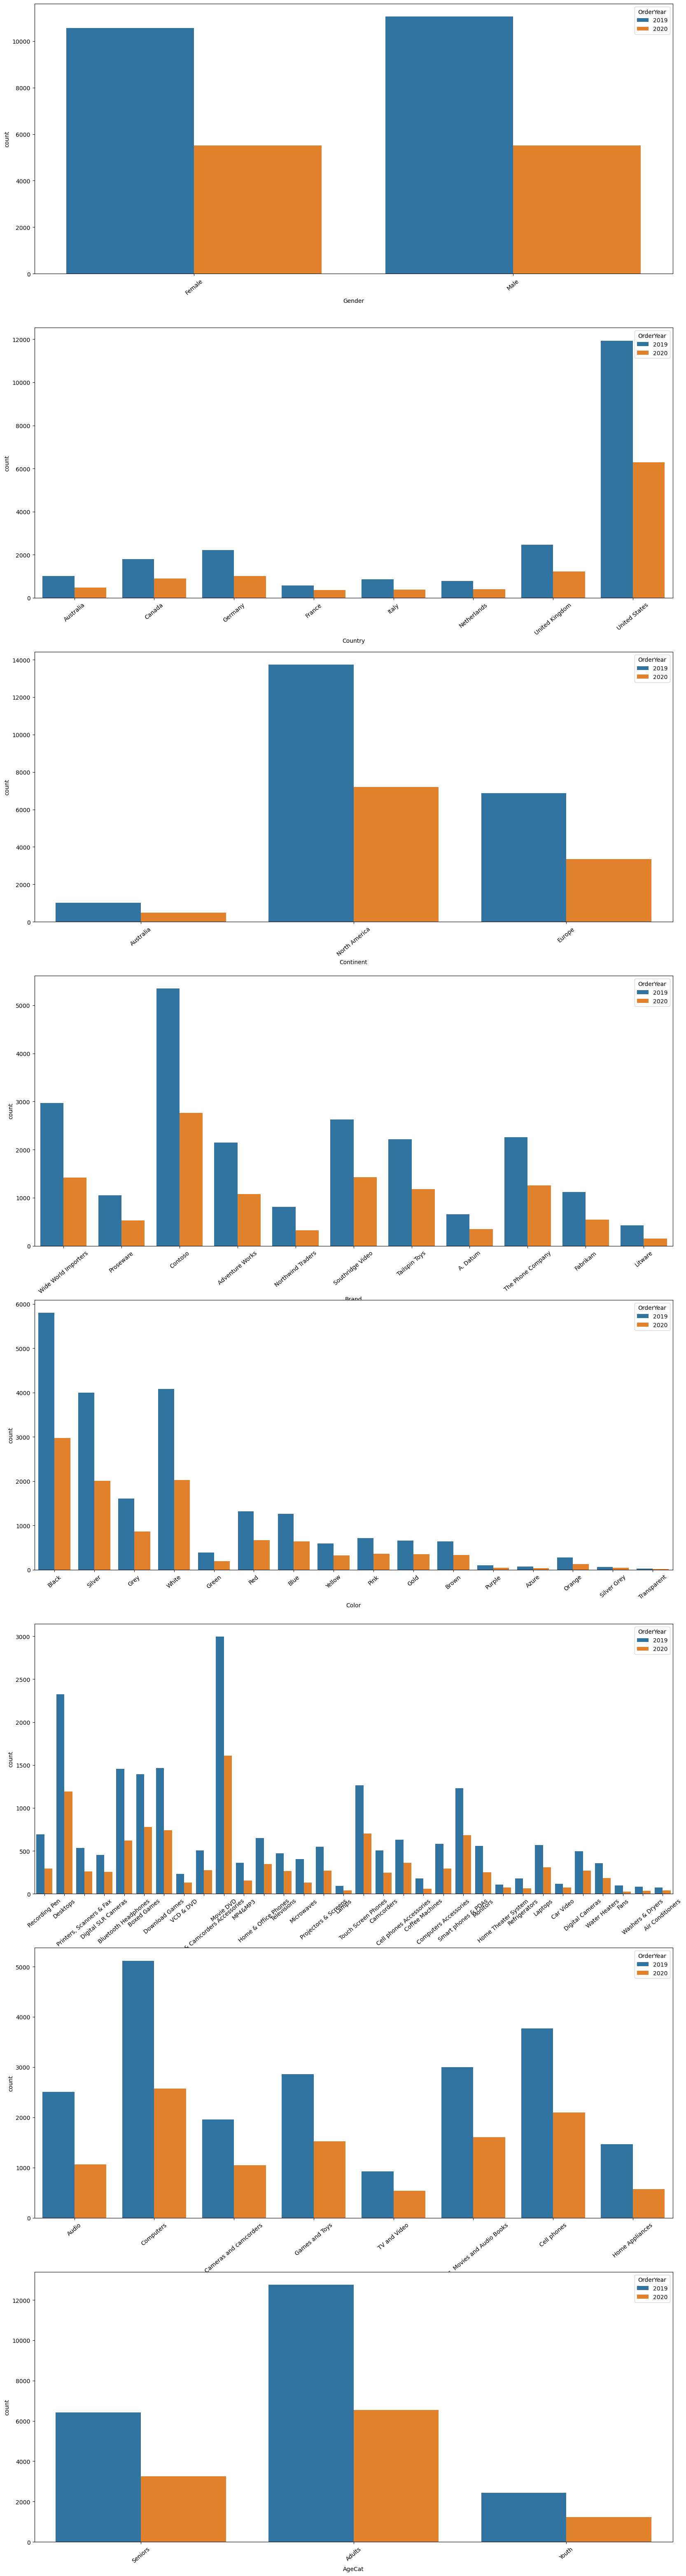

In [21]:
# Univatiate Analysis of data 
x=0
plt.figure(figsize=(20,80))
for col in cat_col:
    x+=1
    plt.subplot(8,1,x)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=40)
    sns.countplot(data=demog_data[demog_data['OrderYear'].isin([2019,2020])],x=col,hue='OrderYear')#normalize=True


In [22]:
# We can see that in all the attibutes there is almost 50% decrease in count when compare 2020 to 2019

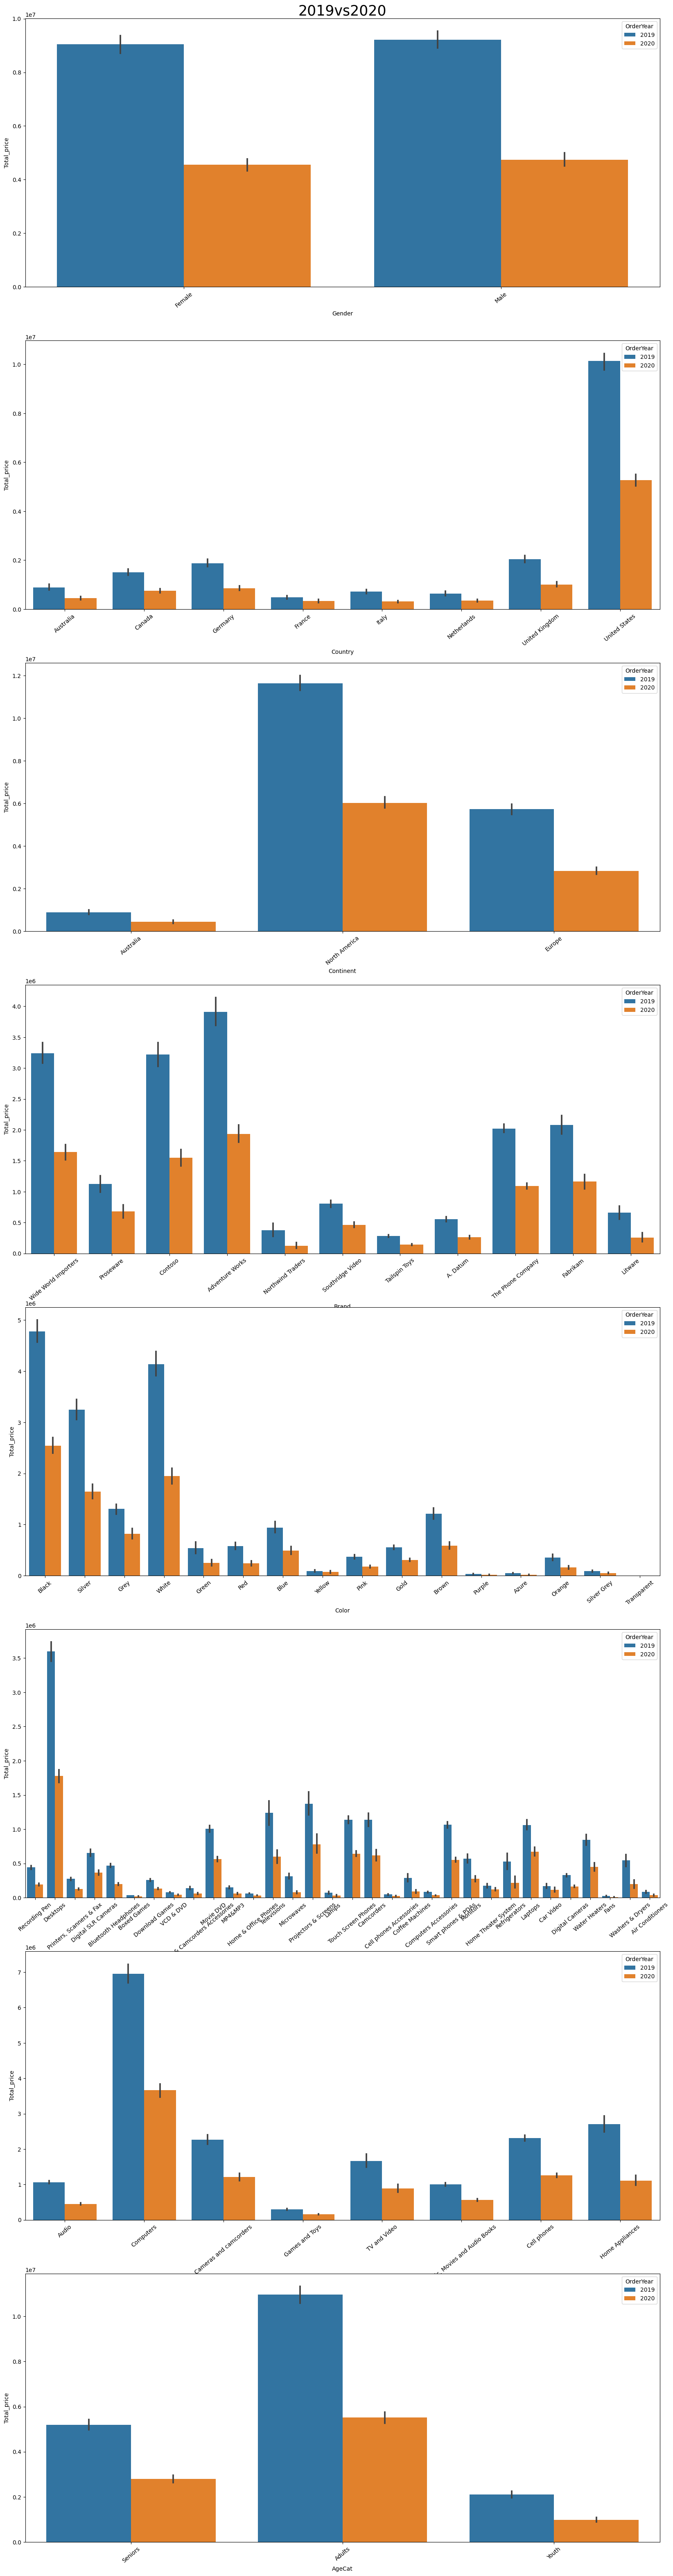

In [23]:
#Bivatiate Analysis on data 
x=0
plt.figure(figsize=(20,80))
for col in cat_col:
    x+=1
    plt.subplot(8,1,x)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=40)
    if x<=1:
        plt.title("2019vs2020",fontsize=25) 
    sns.barplot(data=demog_data[demog_data['OrderYear'].isin([2019,2020])],x=col,y='Total_price',hue='OrderYear',estimator=np.sum)


In [24]:
# When we compare the slaes alos we see 50% decrease accross all the attributes

<AxesSubplot:xlabel='OrderMonth', ylabel='Total Sales'>

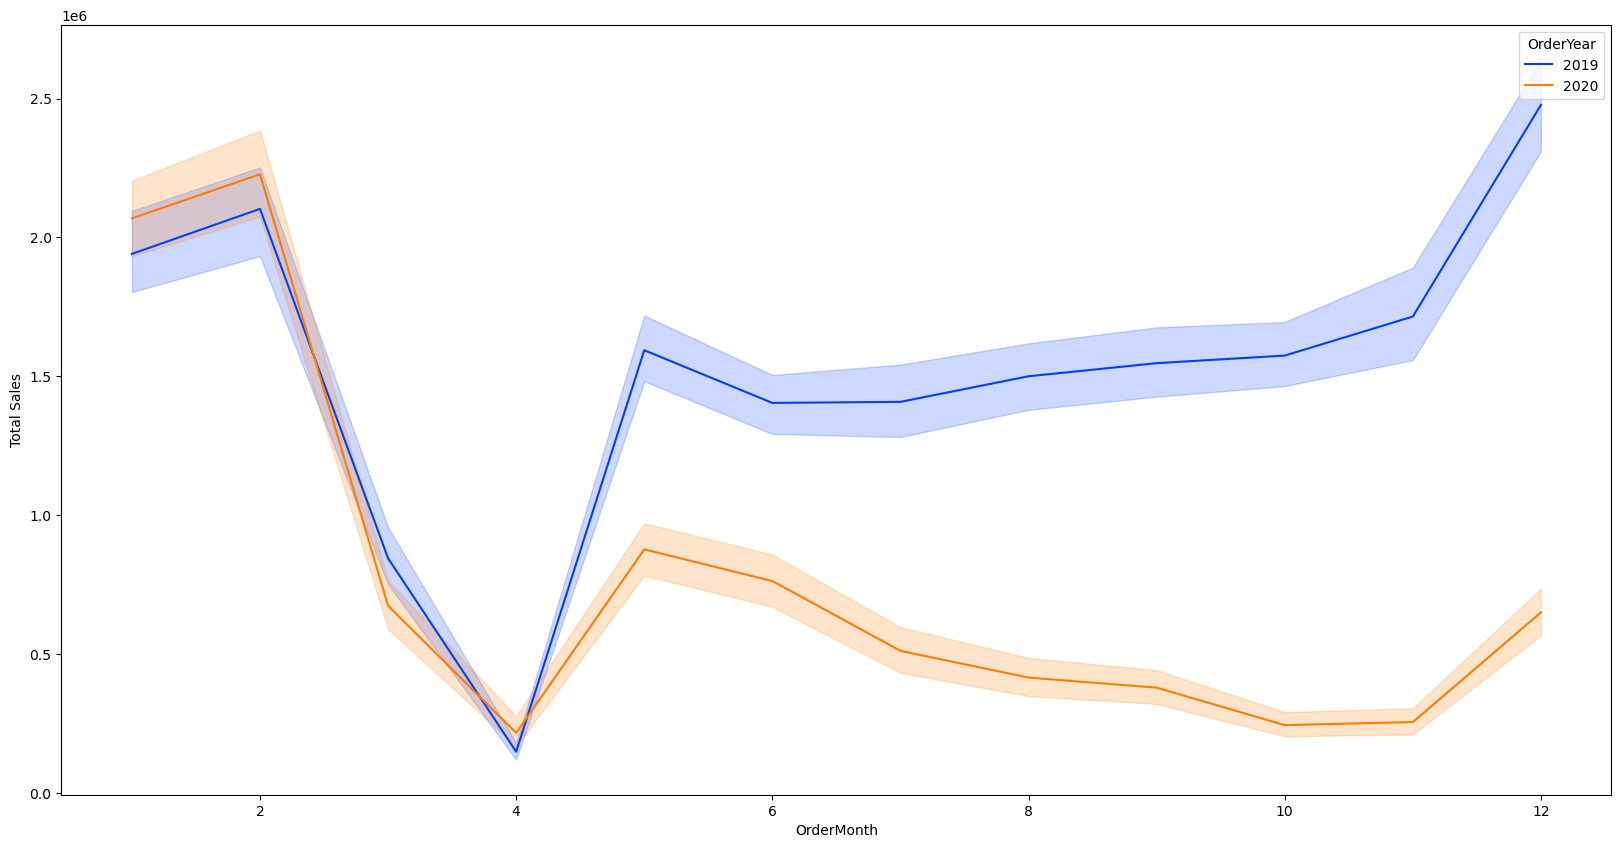

In [25]:
# Line chart to check if it was a gradual decrease or not
plt.figure(figsize=(20,10))
plt.ylabel("Total Sales")
sns.lineplot(data=demog_data[demog_data['OrderYear'].isin([2019,2020])],x='OrderMonth',y='Total_price',hue='OrderYear',estimator=np.sum,palette='bright')

In [26]:
#Univariate analysis of numerical data
num_col
num_col=[i for i in num_col if i not in ['CustomerKey','Birthday','Order Number','Line Item',
 'Order Date',
 'StoreKey',
 'ProductKey',
 'Quantity','SubcategoryKey',
 'CategoryKey',
 'OrderYear'
]]
num_col

['Unit Cost USD', 'Unit Price USD', 'OrderMonth', 'Total_price', 'Age']

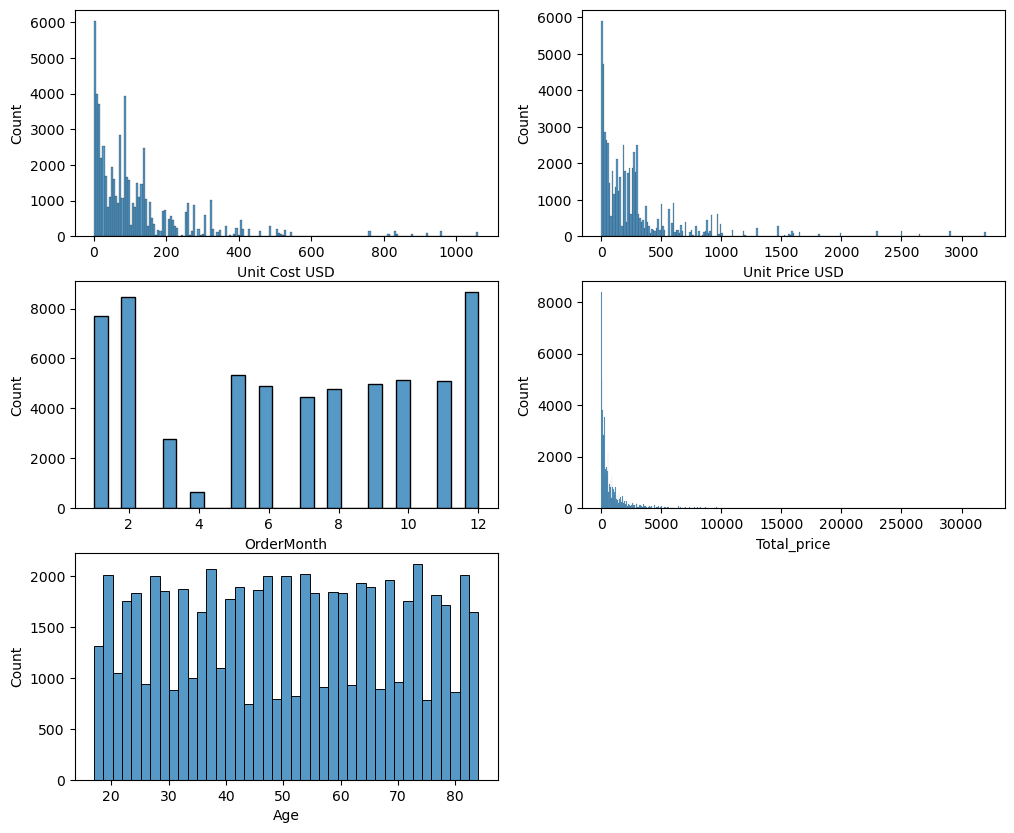

In [27]:
x=0
plt.figure(figsize=(12,10))
for col in num_col:
    x+=1
    plt.subplot(3,2,x)
    sns.histplot(demog_data[col])

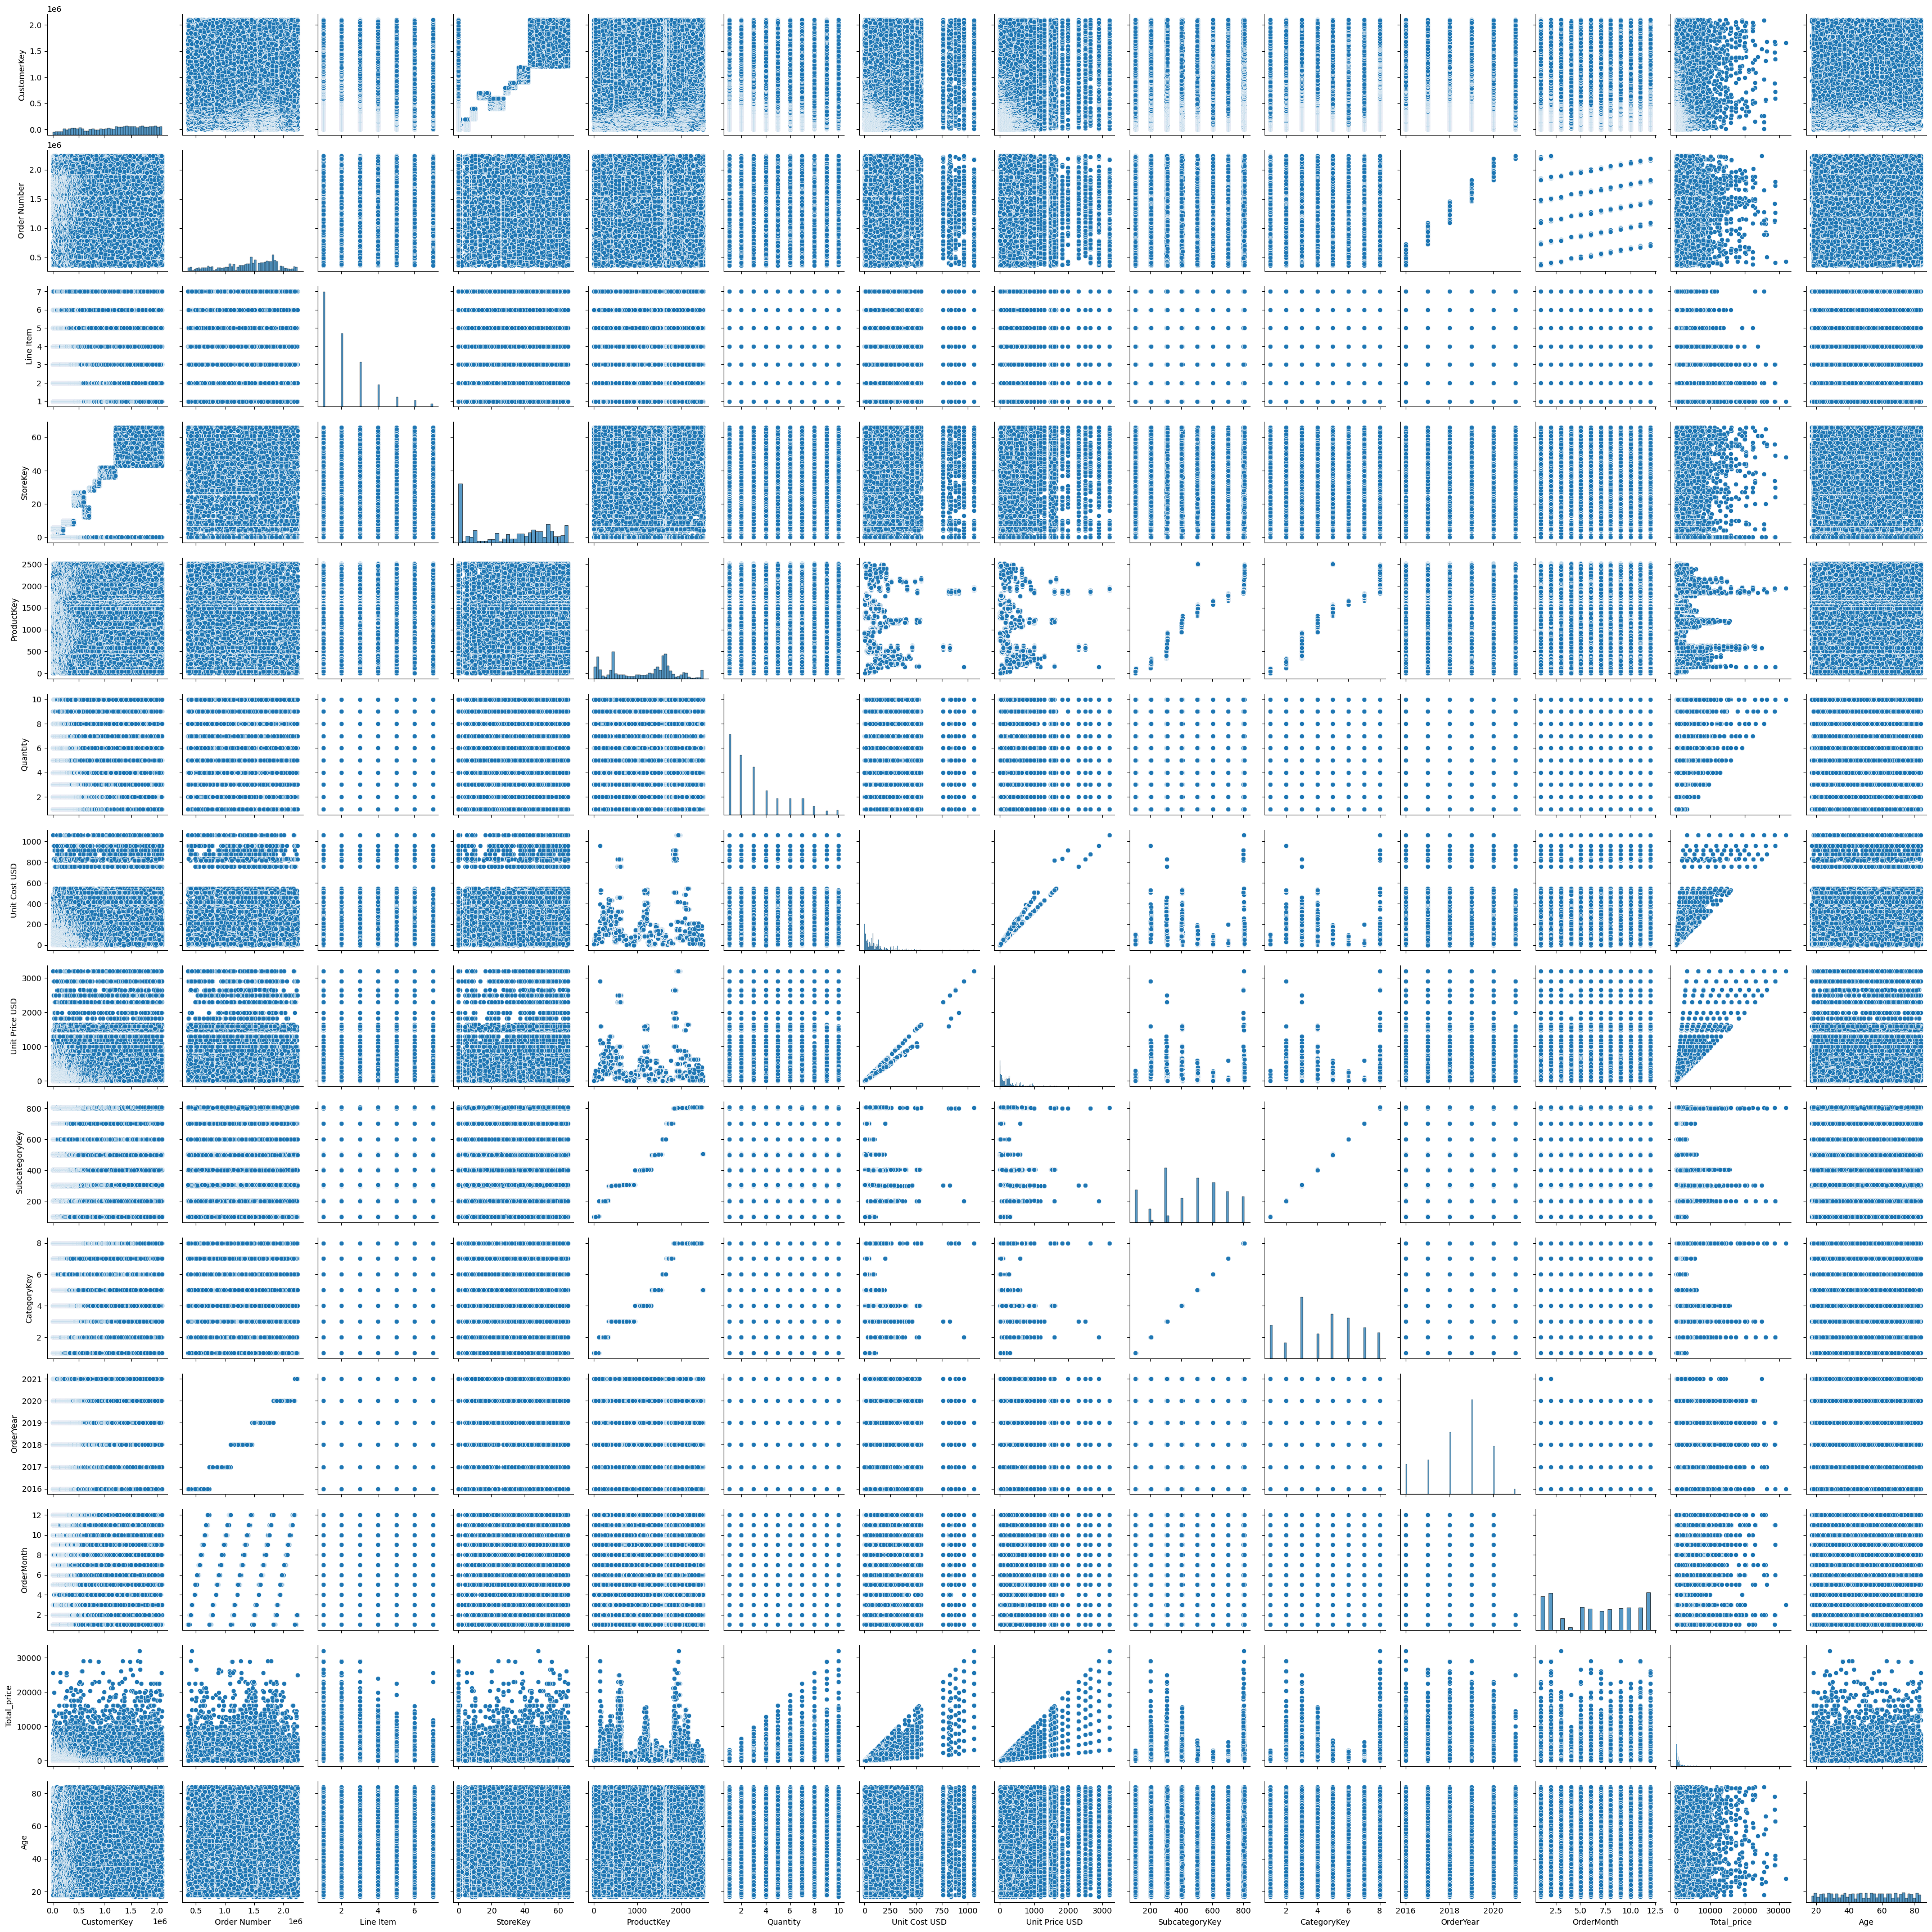

In [28]:
#Bivariate Analysis
sns.pairplot(data=demog_data)

<AxesSubplot:>

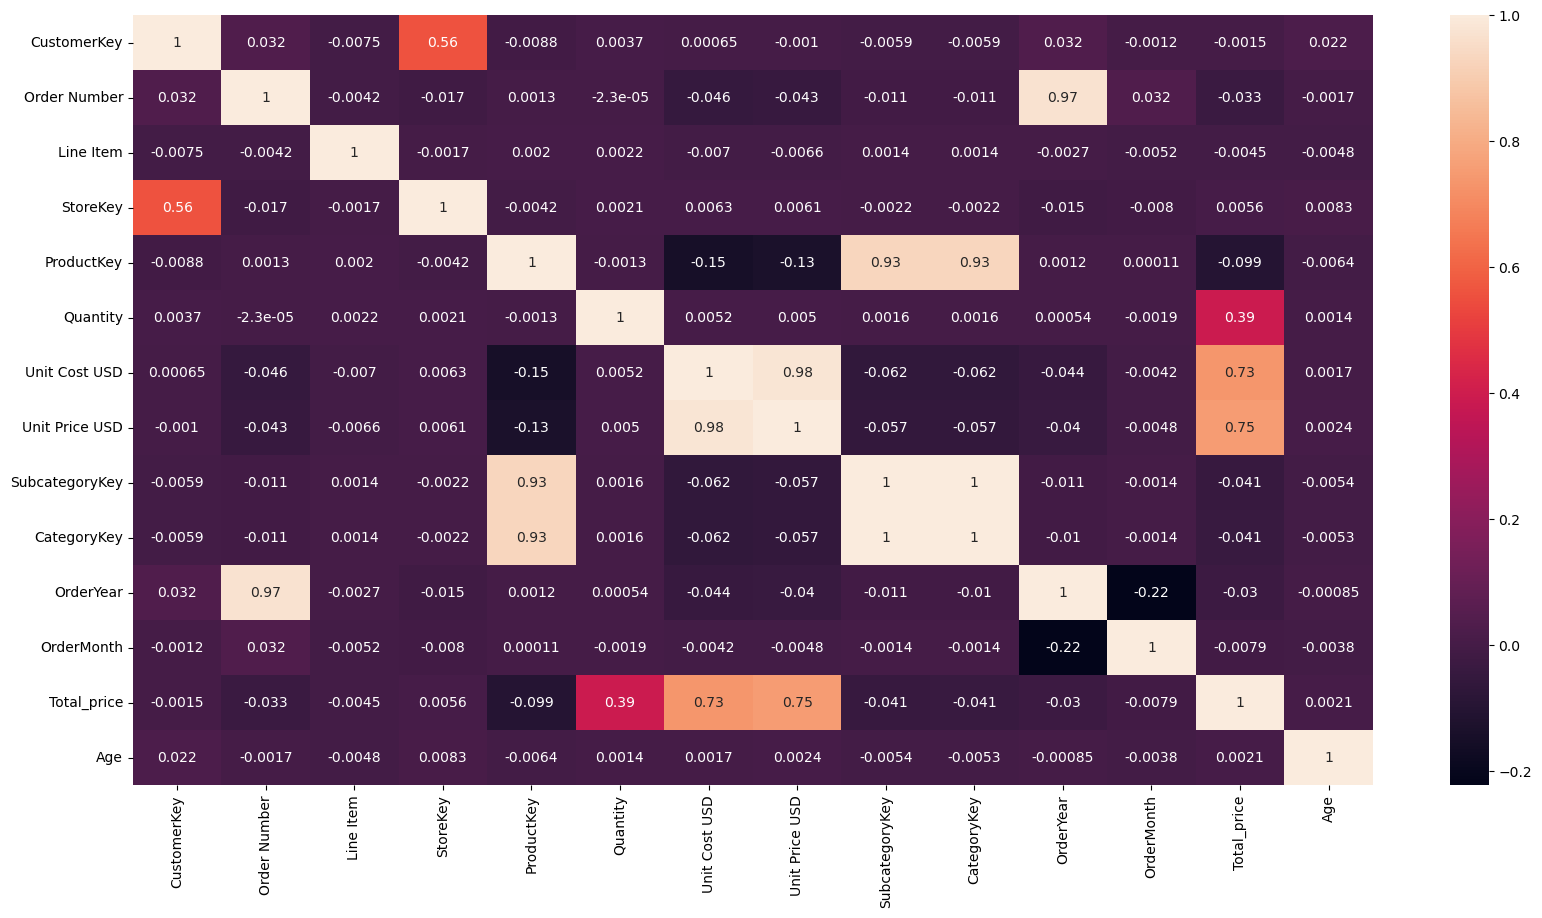

In [29]:
#Coorelation
plt.figure(figsize=(20,10))
sns.heatmap(demog_data.corr(),annot=True)

## Customer segmentation based on purchase pattern

In [30]:
#Total Amount spend by each customer 
sale_prod=sale_data[1].merge(prod_data[1],on='ProductKey')#Joining teh sales table with product table
sale_prod['Total_price']=sale_prod['Unit Price USD']*sale_prod['Quantity']#Calculating total price
sale_prod['Current_date']=pd.to_datetime('2021-03-20')#max date is 2021-02-20 so we are considering next month of this year as base date
customer_spend=sale_prod.groupby('CustomerKey')['Total_price'].sum().reset_index()#AMount sepnd buy each customer

In [31]:
#Frequency of orders of each customer
frequency_order=sale_prod.groupby('CustomerKey')['Order Number'].nunique().reset_index().sort_values('Order Number',ascending=False)

In [32]:
#Recency of orders by customer
recency_data=sale_prod.groupby('CustomerKey')['Order Date'].max().reset_index()
recency_data['Days_from_last']=(pd.to_datetime(sale_prod['Current_date'])-recency_data['Order Date']).dt.days

In [33]:
customer_spend.head(1)

CustomerKey  Total_price
0          301        592.0

In [34]:
frequency_order.head(1)


CustomerKey  Order Number
3664       723572            14

In [35]:
recency_data.head(1)

CustomerKey Order Date  Days_from_last
0          301 2019-11-11           495.0

In [36]:
rfm_data=pd.merge(pd.merge(customer_spend,frequency_order,on='CustomerKey'),recency_data,on='CustomerKey')#joining the sale,prod data with customer data
rfm_data=rfm_data.merge(cust_data[1],on='CustomerKey')
rfm_data['OrderYear']=rfm_data['Order Date'].dt.year
rfm_data=rfm_data.rename({'Order Number':'Frequency'},axis=1)
rfm_data

CustomerKey  Total_price  Frequency Order Date  Days_from_last  Gender  \
0              301       592.00          1 2019-11-11           495.0  Female   
1              325      5787.67          3 2020-01-04           441.0  Female   
2              554       951.71          2 2019-12-05           471.0  Female   
3             1042      1124.91          1 2018-03-06          1110.0    Male   
4             1314      2539.86          1 2017-12-19          1187.0    Male   
...            ...          ...        ...        ...             ...     ...   
11882      2099383      3739.00          3 2020-05-30           294.0  Female   
11883      2099600      1270.84          1 2018-08-08           955.0  Female   
11884      2099758       529.91          2 2020-06-10           283.0    Male   
11885      2099862       501.50          1 2020-01-01           444.0  Female   
11886      2099937     11775.39          2 2020-02-15           399.0    Male   

                   Name                 City State Code               State  \
0         Lilly Harding       WANDEARAH EAST         SA     South Australia   
1          Madison Hull           MOUNT BUDD         WA   Western Australia   
2         Claire Ferres            WINJALLOK        VIC            Victoria   
3       Aidan Pankhurst        TAWONGA SOUTH        VIC            Victoria   
4          Isaac Israel          EDITH RIVER         NT  Northern Territory   
...                 ...                  ...        ...                 ...   
11882  Yseult Lacharité         Indianapolis         IN             Indiana   
11883    Denisa Dušková              Houston         TX               Texas   
11884   Svend Petrussen           Wilmington         NC      North Carolina   
11885      Lorenza Rush            Riverside         CA          California   
11886  Zygmunt Kaminski  Bloomfield Township         MI            Michigan   

      Zip Code        Country      Continent   Birthday  OrderYear  
0         5523      Australia      Australia 1939-07-03       2019  
1         6522      Australia      Australia 1979-09-27       2020  
2         3380      Australia      Australia 1947-05-26       2019  
3         3698      Australia      Australia 1965-11-19       2018  
4          852      Australia      Australia 1965-12-21       2017  
...        ...            ...            ...        ...        ...  
11882    46268  United States  North America 2000-02-24       2020  
11883    77017  United States  North America 1936-03-25       2018  
11884    28405  United States  North America 1937-11-09       2020  
11885    92501  United States  North America 1937-10-12       2020  
11886    48302  United States  North America 1965-08-18       2020  

[11887 rows x 15 columns]

In [37]:
sale_data[1]['Order Date'].max(),sale_data[1]['Order Date'].min()

(Timestamp('2021-02-20 00:00:00'), Timestamp('2016-01-01 00:00:00'))

In [38]:
#RFM Segmentation scoring
f0=0
f40=rfm_data['Frequency'].quantile(.40)
f70=rfm_data['Frequency'].quantile(.70)
f100=rfm_data['Frequency'].quantile(1)

bins=[f0,f40,f70,f100]
labels=['1','2','3']

rfm_data['F_score']=pd.cut(rfm_data['Frequency'],bins=bins,labels=labels)

In [39]:
r0=0
r20=rfm_data['Days_from_last'].quantile(.20)
r40=rfm_data['Days_from_last'].quantile(.40)
r60=rfm_data['Days_from_last'].quantile(.60)
r80=rfm_data['Days_from_last'].quantile(.80)
r100=rfm_data['Days_from_last'].quantile(1)

bins=[r0,r20,r40,r60,r80,r100]
labels=['5','4','3','2','1']

rfm_data['R_score']=pd.cut(rfm_data['Days_from_last'],bins=bins,labels=labels)

In [40]:
m0=0
m40=rfm_data['Total_price'].quantile(.40)
m70=rfm_data['Total_price'].quantile(.70)
m100=rfm_data['Total_price'].quantile(1)

bins=[m0,m40,m70,m100]
labels=['1','2','3']

rfm_data['M_score']=pd.cut(rfm_data['Total_price'],bins=bins,labels=labels)

In [41]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11887 entries, 0 to 11886
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     11887 non-null  int64         
 1   Total_price     11887 non-null  float64       
 2   Frequency       11887 non-null  int64         
 3   Order Date      11887 non-null  datetime64[ns]
 4   Days_from_last  11887 non-null  float64       
 5   Gender          11887 non-null  object        
 6   Name            11887 non-null  object        
 7   City            11887 non-null  object        
 8   State Code      11878 non-null  object        
 9   State           11887 non-null  object        
 10  Zip Code        11887 non-null  object        
 11  Country         11887 non-null  object        
 12  Continent       11887 non-null  object        
 13  Birthday        11887 non-null  datetime64[ns]
 14  OrderYear       11887 non-null  int64         
 15  F_

In [42]:
#Changing the data type for calculation
rfm_data['F_score']=rfm_data['F_score'].astype(int)
rfm_data['R_score']=rfm_data['R_score'].astype(int)
rfm_data['M_score']=rfm_data['M_score'].astype(int)

rfm_data['FM_score']=(rfm_data['M_score']+rfm_data['F_score'])/2

In [43]:
rfm_data['CustomerKey']=rfm_data['CustomerKey'].astype(str)
rfm_data.shape

(11887, 19)

In [44]:
#Function to segment customers based on RFM scores
def segment(df):
    if df['R_score']<=2 :
        if df['FM_score']<=1:
            return "Lost"
        elif df['FM_score']>1 and df['FM_score']<=2:
            return "Hybernating"
        else:
            return "Cant lose them"
    elif df['R_score']>2 and df['R_score']<=4:
        if df['FM_score']<=1:
            return "About to sleep"
        elif df['FM_score']>1 and df['FM_score']<=2:
            return "Need Attetnion"
        else:
            return "Loyal"
    else:
        if df['FM_score']<=1:
            return "Price sensitive & recent customer"
        elif df['FM_score']>1 and df['FM_score']<=1:
            return "Potential Loyalist"
        else:
            return "Champion"


In [45]:
rfm_data['Segment']=rfm_data.apply(segment,axis='columns')

In [46]:
rfm_data['Segment'].value_counts()
rfm_data21=rfm_data.copy()

In [47]:
#This function is used to do the above RFM segmentation for data till perticular date and last purchas date for frequency
def salestill_date(date_filterr,last_pur):
    #Total Amount spend by each customer 
    sale_prod=sale_data[1][sale_data[1]['Order Date'].dt.year<=date_filterr].merge(prod_data[1],on='ProductKey')
    sale_prod['Total_price']=sale_prod['Unit Price USD']*sale_prod['Quantity']
    sale_prod['Current_date']=pd.to_datetime(last_pur)#max date is 2021-02-20 so we are considering next month of this year as base date
    customer_spend=sale_prod.groupby('CustomerKey')['Total_price'].sum().reset_index()
    
    #Frequency of orders of each customer
    frequency_order=sale_prod.groupby('CustomerKey')['Order Number'].nunique().reset_index().sort_values('Order Number',ascending=False)
    
    #Recency of orders by customer
    recency_data=sale_prod.groupby('CustomerKey')['Order Date'].max().reset_index()
    recency_data['Days_from_last']=(pd.to_datetime(sale_prod['Current_date'])-recency_data['Order Date']).dt.days
    
    #join all tables
    rfm_data=pd.merge(pd.merge(customer_spend,frequency_order,on='CustomerKey'),recency_data,on='CustomerKey')
    rfm_data=rfm_data.merge(cust_data[1],on='CustomerKey')
    rfm_data['OrderYear']=rfm_data['Order Date'].dt.year
    rfm_data=rfm_data.rename({'Order Number':'Frequency'},axis=1)
    
    #Frequency scoring
    f0=0
    f40=rfm_data['Frequency'].quantile(.40)
    f70=rfm_data['Frequency'].quantile(.70)
    f100=rfm_data['Frequency'].quantile(1)

    bins=[f0,f40,f70,f100]
    labels=['1','2','3']

    rfm_data['F_score']=pd.cut(rfm_data['Frequency'],bins=bins,labels=labels)
    
    #recency scoring
    r0=0
    r20=rfm_data['Days_from_last'].quantile(.20)
    r40=rfm_data['Days_from_last'].quantile(.40)
    r60=rfm_data['Days_from_last'].quantile(.60)
    r80=rfm_data['Days_from_last'].quantile(.80)
    r100=rfm_data['Days_from_last'].quantile(1)

    bins=[r0,r20,r40,r60,r80,r100]
    labels=['5','4','3','2','1']

    rfm_data['R_score']=pd.cut(rfm_data['Days_from_last'],bins=bins,labels=labels)
    
    #Monitary scoring
    m0=0
    m40=rfm_data['Total_price'].quantile(.40)
    m70=rfm_data['Total_price'].quantile(.70)
    m100=rfm_data['Total_price'].quantile(1)

    bins=[m0,m40,m70,m100]
    labels=['1','2','3']

    rfm_data['M_score']=pd.cut(rfm_data['Total_price'],bins=bins,labels=labels)
    
    #type conversion
    rfm_data['F_score']=rfm_data['F_score'].astype(int)
    rfm_data['R_score']=rfm_data['R_score'].astype(int)
    rfm_data['M_score']=rfm_data['M_score'].astype(int)

    rfm_data['FM_score']=(rfm_data['M_score']+rfm_data['F_score'])/2
    rfm_data['CustomerKey']=rfm_data['CustomerKey'].astype(str)
    
    #Segmenting
    rfm_data['Segment']=rfm_data.apply(segment,axis='columns')
    return rfm_data

In [48]:
#RMF for data till 2019
rfm_data19=salestill_date(2019,'2020-01-31')

In [49]:
rfm_data19['Order Date'].max()

Timestamp('2019-12-31 00:00:00')

In [50]:
#RMF for data till 2020
rfm_data20=salestill_date(2020,'2021-01-31')

In [51]:
rfm_data20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11820 entries, 0 to 11819
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     11820 non-null  object        
 1   Total_price     11820 non-null  float64       
 2   Frequency       11820 non-null  int64         
 3   Order Date      11820 non-null  datetime64[ns]
 4   Days_from_last  11820 non-null  float64       
 5   Gender          11820 non-null  object        
 6   Name            11820 non-null  object        
 7   City            11820 non-null  object        
 8   State Code      11811 non-null  object        
 9   State           11820 non-null  object        
 10  Zip Code        11820 non-null  object        
 11  Country         11820 non-null  object        
 12  Continent       11820 non-null  object        
 13  Birthday        11820 non-null  datetime64[ns]
 14  OrderYear       11820 non-null  int64         
 15  F_

In [52]:
rfm_data19['Segment'].value_counts(normalize=True)*100

Hybernating                          16.904258
Champion                             16.729513
Lost                                 16.490389
Need Attetnion                       15.819001
Loyal                                14.926883
About to sleep                        9.215488
Cant lose them                        6.594316
Price sensitive & recent customer     3.320151
Name: Segment, dtype: float64

In [53]:
rfm_data20['Segment'].value_counts(normalize=True)*100

Lost                                 19.636210
Hybernating                          17.258883
Need Attetnion                       16.175973
Champion                             15.338409
About to sleep                       12.487310
Loyal                                11.049069
Price sensitive & recent customer     4.966159
Cant lose them                        3.087986
Name: Segment, dtype: float64

In [54]:
comb_19_20=pd.concat([rfm_data19,rfm_data20])#Joining the data 

Text(0, 0.5, 'Count of Cusotmer in Each Segment')

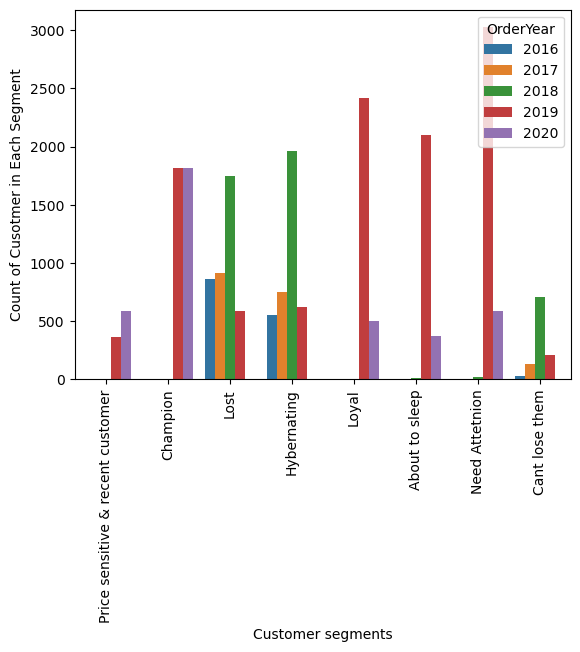

In [55]:
#Visualising the data 
sns.countplot(data=comb_19_20,x='Segment',hue='OrderYear')
plt.xticks(rotation=90)
plt.xlabel("Customer segments")
plt.ylabel("Count of Cusotmer in Each Segment")

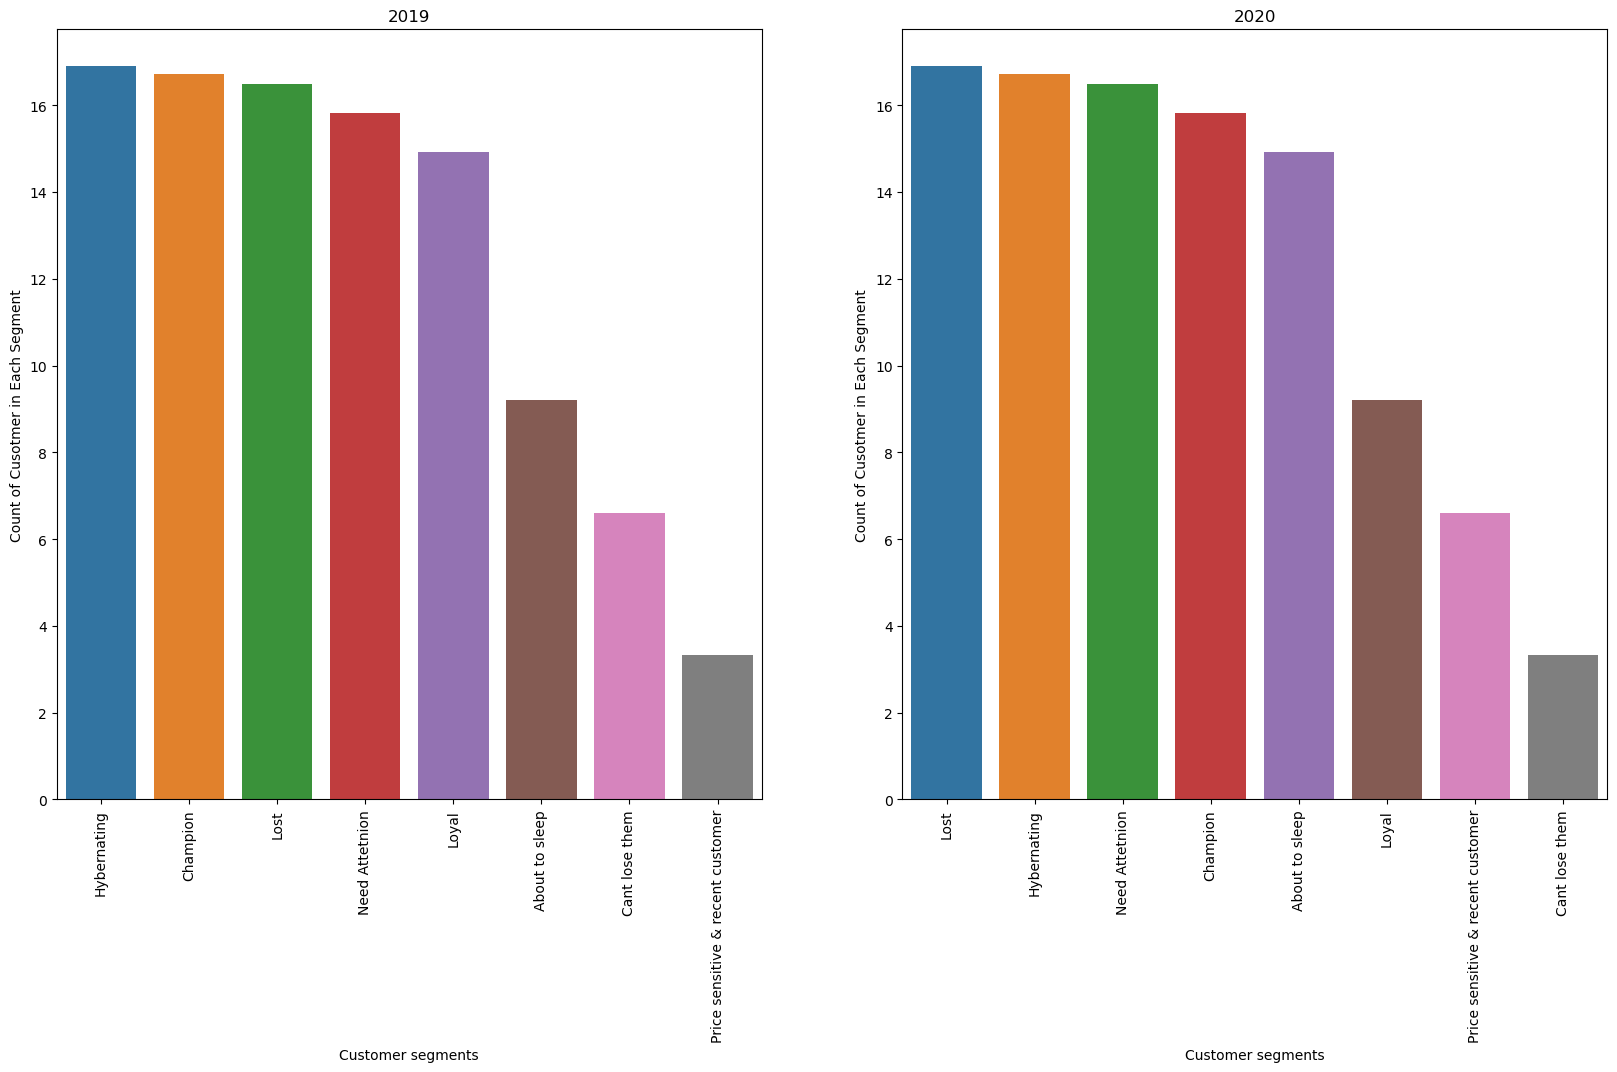

In [56]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=rfm_data19['Segment'].value_counts().index,y=(rfm_data19['Segment'].value_counts(normalize=True)*100).values)
plt.title('2019')
plt.xticks(rotation=90)
plt.xlabel("Customer segments")
plt.ylabel("Count of Cusotmer in Each Segment")

plt.subplot(1,2,2)
sns.barplot(x=rfm_data20['Segment'].value_counts().index,y=(rfm_data19['Segment'].value_counts(normalize=True)*100).values)
plt.title('2020')
plt.xticks(rotation=90)
plt.xlabel("Customer segments")
plt.ylabel("Count of Cusotmer in Each Segment")
plt.show()

In [57]:
## We can see that the customer in certaing segments have reduced in number compare to 2019 for the above charts
#The main revenue of the company is provided by the customers in the segment Loyal,
#        cant loss them and champions,which has reduced

In [58]:
from scipy.stats import f_oneway,kruskal

In [59]:
rfm_data21['LogNorm']=np.log(rfm_data21['Total_price'])

In [60]:
s1=rfm_data21[rfm_data21['Segment']=='Hybernating'][['Total_price','LogNorm']]
s2=rfm_data21[rfm_data21['Segment']=='Champion'][['Total_price','LogNorm']]
s3=rfm_data21[rfm_data21['Segment']=='Lost'][['Total_price','LogNorm']]
s4=rfm_data21[rfm_data21['Segment']=='Need Attetnion'][['Total_price','LogNorm']]
s5=rfm_data21[rfm_data21['Segment']=='Loyal'][['Total_price','LogNorm']]
s6=rfm_data21[rfm_data21['Segment']=='About to sleep'][['Total_price','LogNorm']]
s7=rfm_data21[rfm_data21['Segment']=='Cant lose them'][['Total_price','LogNorm']]
s8=rfm_data21[rfm_data21['Segment']=='Hybernating'][['Total_price','LogNorm']]
s9=rfm_data21[rfm_data21['Segment']=='Price sensitive & recent customer'][['Total_price','LogNorm']]
s1.mean(),s2.mean(),s3.mean(),s4.mean(),s5.mean(),s6.mean(),s7.mean(),s8.mean(),s9.mean()

(Total_price    5337.367179
 LogNorm           8.393673
 dtype: float64,
 Total_price    7838.471151
 LogNorm           8.703691
 dtype: float64,
 Total_price    855.639717
 LogNorm          6.301303
 dtype: float64,
 Total_price    4821.14486
 LogNorm           8.27884
 dtype: float64,
 Total_price    10179.560217
 LogNorm            9.078458
 dtype: float64,
 Total_price    919.029777
 LogNorm          6.399494
 dtype: float64,
 Total_price    10004.881701
 LogNorm            9.080516
 dtype: float64,
 Total_price    5337.367179
 LogNorm           8.393673
 dtype: float64,
 Total_price    900.641283
 LogNorm          6.360502
 dtype: float64)

<AxesSubplot:xlabel='Total_price', ylabel='Count'>

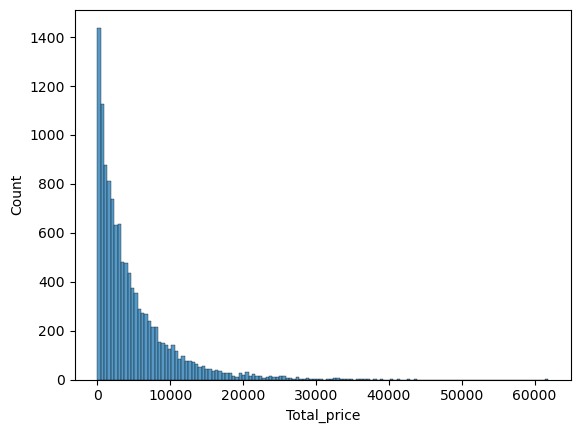

In [61]:
sns.histplot(rfm_data21['Total_price'])

<AxesSubplot:xlabel='LogNorm', ylabel='Count'>

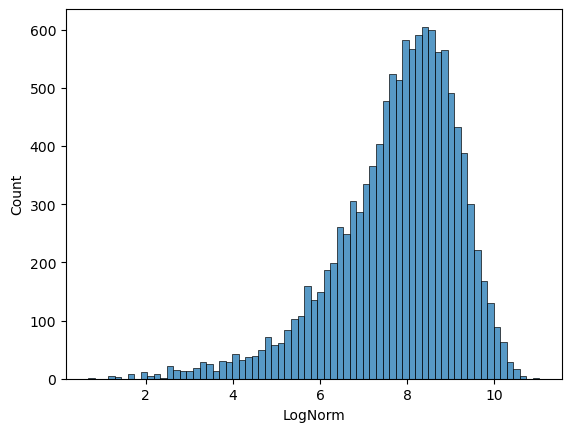

In [62]:
sns.histplot(rfm_data21['LogNorm'])

In [63]:
f_oneway(s1['LogNorm'],s2['LogNorm'],s3['LogNorm'],s4['LogNorm'],s5['LogNorm'],s6['LogNorm'],s7['LogNorm'],s8['LogNorm'],s9['LogNorm'])

F_onewayResult(statistic=2731.1648668159946, pvalue=0.0)

In [64]:
kruskal(s1['Total_price'],s2['Total_price'],s3['Total_price'],s4['Total_price'],s5['Total_price'],s6['Total_price'],s7['Total_price'],s8['Total_price'],s9['Total_price'])

KruskalResult(statistic=9452.286094077794, pvalue=0.0)

In [65]:
#Since the p value is less than .05 alpha we can say that there is difference in means

## Conclusion

In [389]:
## Form analysing the give data set We can see that the the decrease in the sale is not for a perticular demographic.We can see 
# the decrese in all the attributes .Since it has happened after 2019 when it was the covid time and that was the main
# thing that effected world wide during that time period that might be the major reason.

## In RFM segmentation also we can see that there is a decreas in cutomers in certain segments perticularly the ones that is
# responsible for the major contribution in sale. As the covide recudes and the market goes up there is a possibility that the 
# sales might also increas . I order to boos that it would we better to do some campaign to bring the loyal customer segment 
# back up. 